## price Prediction

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX   
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900  1.0  296  \
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671  2.0  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671  2.0  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622  3.0  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622  3.0  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
504  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786  1.0  273   
505  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875  1.0  273   
506  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675  1.0  273   
507  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889  1.0  273   
508  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050  1.0  273   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     509 non-null    float64
 1   ZN       509 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     509 non-null    int64  
 4   NOX      507 non-null    float64
 5   RM       509 non-null    float64
 6   AGE      508 non-null    float64
 7   DIS      509 non-null    float64
 8   RAD      508 non-null    float64
 9   TAX      509 non-null    int64  
 10  PTRATIO  509 non-null    float64
 11  B        509 non-null    float64
 12  LSTAT    508 non-null    float64
 13  MEDV     509 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.8 KB


In [5]:
housing['CHAS'].value_counts()

CHAS
0    474
1     35
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,509.000000,509.000000,506.000000,509.000000,507.000000,509.000000,508.000000,509.000000,508.000000,509.000000,509.000000,509.000000,508.000000,509.000000
mean,3.707516,11.296660,11.198281,0.068762,0.555216,6.279845,68.579134,3.787705,9.610236,409.216110,18.463851,356.664892,12.705276,22.501572
std,8.732089,23.269781,6.856713,0.253298,0.115633,0.703449,28.114744,2.101852,8.735069,168.814161,2.161553,91.562469,7.131979,9.183497
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.880000,45.075000,2.100700,4.000000,279.000000,17.400000,375.330000,7.092500,17.000000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.202000,77.150000,3.182700,5.000000,330.000000,19.100000,391.450000,11.430000,21.200000
75%,3.693110,12.500000,18.100000,0.000000,0.624000,6.619000,94.100000,5.118000,24.000000,666.000000,20.200000,396.240000,16.992500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

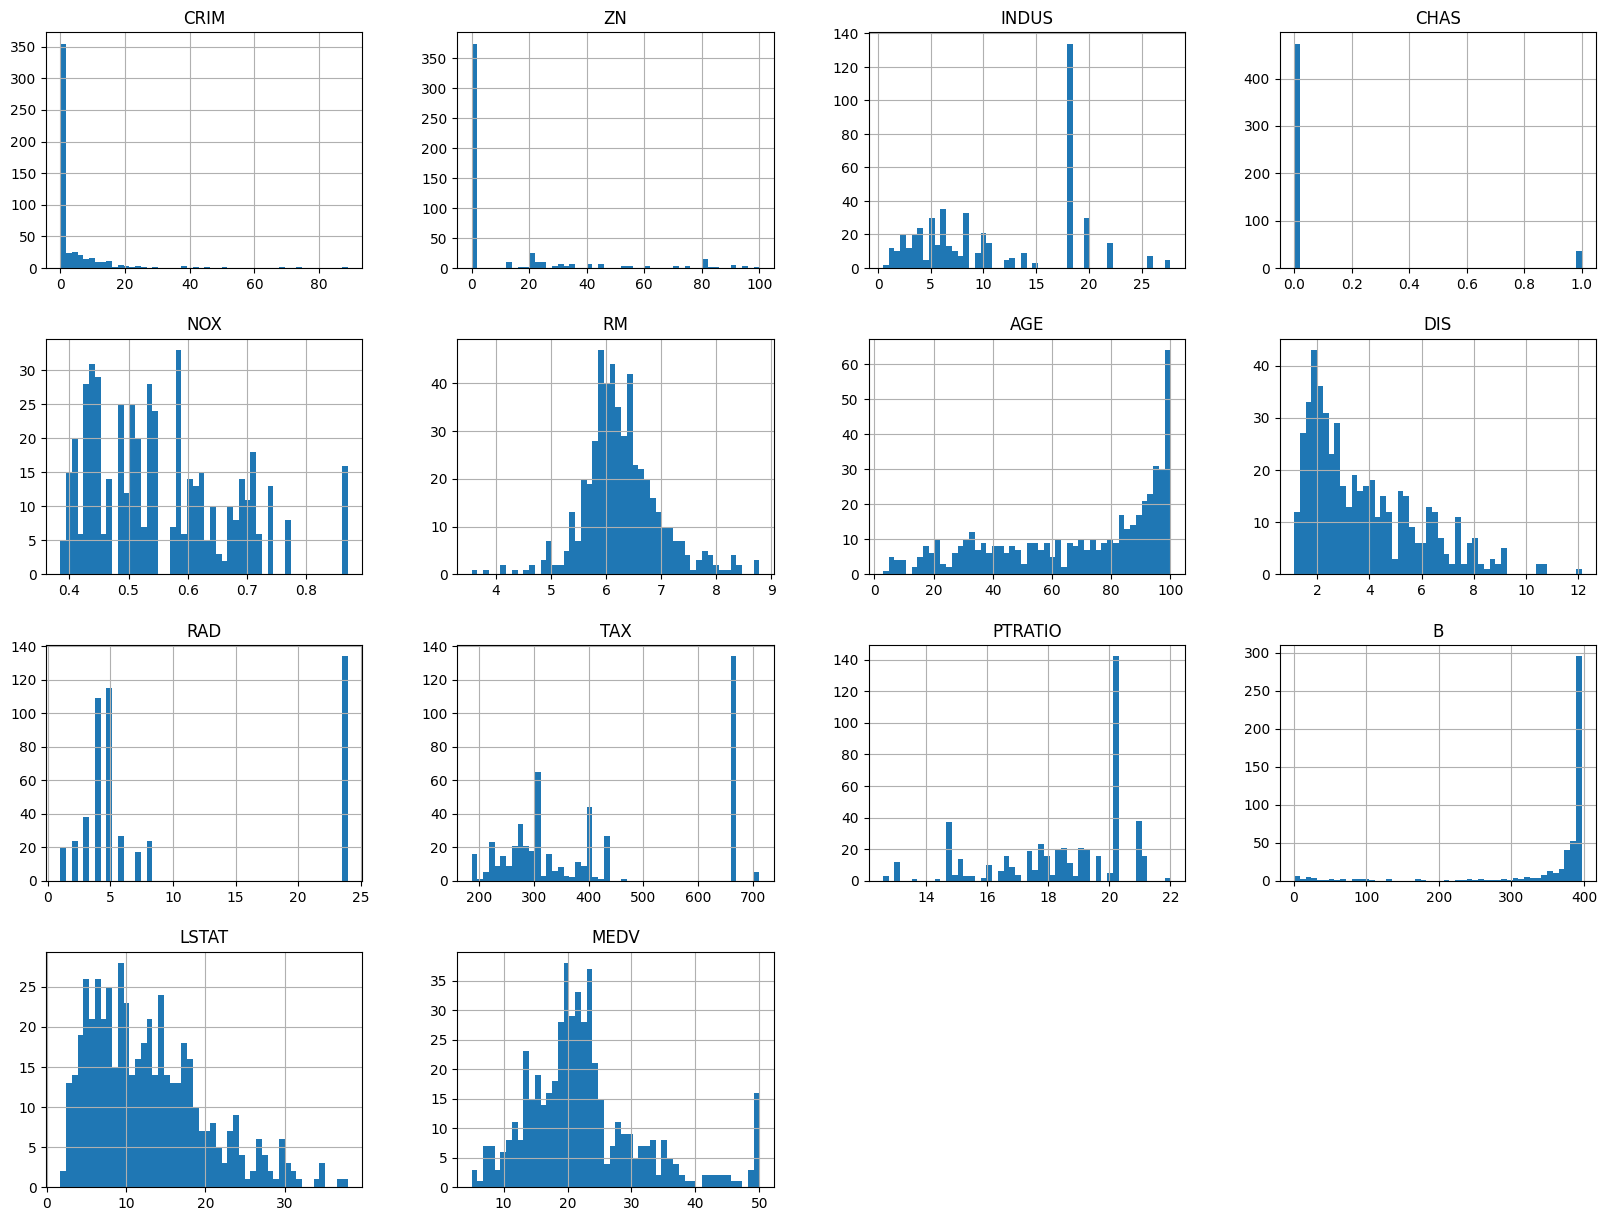

In [9]:
housing.hist(bins=50,figsize=(20,15))

## Train-Test Spleating

In [10]:
import numpy as np

In [11]:
# ##############################################################for learning purpose
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size:]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
# train_set,test_set=split_train_test(housing,0.2)

In [13]:
# print(f"Rows of Train set : {len(train_set)}\nRows of Test set : {len(test_set)}\n")

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows of Train set : {len(train_set)}\nRows of Test set : {len(test_set)}\n")

Rows of Train set : 407
Rows of Test set : 102



In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    start_train_set=housing.loc[train_index]
    start_test_set=housing.loc[test_index]

In [16]:
# test_index

In [17]:
# start_test_set.info()
# start_test_set['CHAS'].value_counts()


In [18]:
# start_train_set['CHAS'].value_counts()


In [19]:
housing= start_train_set.copy()

## looking for correlations

In [20]:
corr_matrix=housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680208
B          0.360157
ZN         0.347233
DIS        0.251687
CHAS       0.192252
AGE       -0.374874
RAD       -0.398431
CRIM      -0.406259
NOX       -0.434322
TAX       -0.473994
INDUS     -0.489730
PTRATIO   -0.503211
LSTAT     -0.736736
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

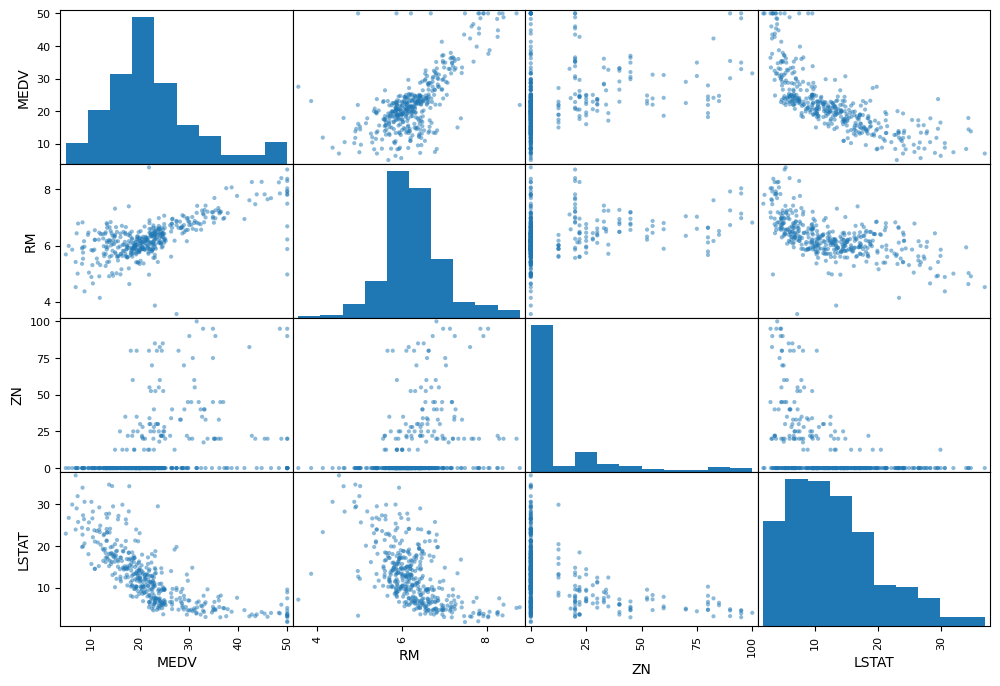

In [22]:
from pandas.plotting import scatter_matrix
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

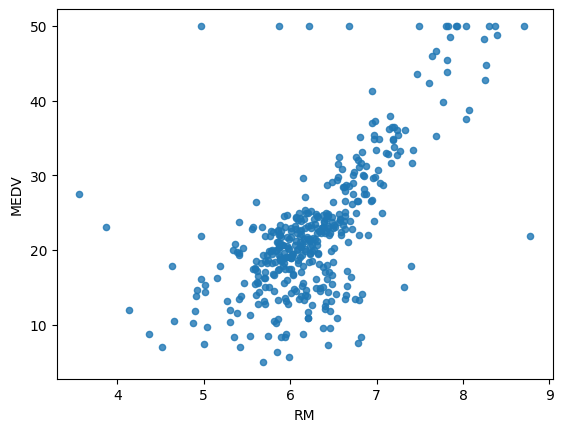

In [23]:
housing.plot(kind="scatter",x="RM",y="MEDV",alpha=0.8)

## Trying out Attribute combinations

In [24]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

In [25]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
316,0.31827,0.0,9.90,0,0.544,5.914,83.2,3.9986,4.0,304,18.4,390.70,18.33,17.8,51.403449
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5.0,384,20.9,394.47,13.44,19.3,62.571289
314,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4.0,304,18.4,395.69,9.28,23.8,46.292066
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4.0,307,21.0,395.62,8.47,19.9,52.622557
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5.0,264,13.0,392.40,10.45,22.8,47.482014


In [26]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680208
B          0.360157
ZN         0.347233
DIS        0.251687
CHAS       0.192252
AGE       -0.374874
RAD       -0.398431
CRIM      -0.406259
NOX       -0.434322
TAX       -0.473994
INDUS     -0.489730
PTRATIO   -0.503211
TAXRM     -0.537562
LSTAT     -0.736736
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

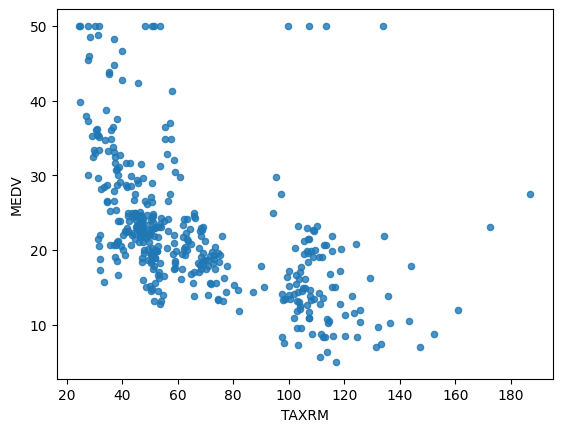

In [27]:
housing.plot(kind="scatter",x="TAXRM",y="MEDV",alpha=0.8)

In [28]:
housing=start_train_set.drop("MEDV",axis=1)
housing_labels=start_train_set['MEDV'].copy()

## Missing Attributes

In [29]:
# To take care of missing attributes , we have three options:
#     1.Get rid of the missing data points
#     2.Get rid of the whole attributes   
#     3.Set the value to some value(0, mean or median)

a=housing.dropna(subset=["RM"]) # option number 1
a.shape
# housing.shape
# original dataframe will remain unchanged


(407, 13)

In [30]:
# housing.drop("RM",axis=1) #option 2
# There is no RM column but original dataframe will remain unchanged 

In [31]:
median=housing["RM"].median()

In [32]:
housing["RM"].fillna(median)
# original dataframe will remain unchanged

316    5.914
103    6.137
314    6.567
15     5.834
265    5.560
       ...  
234    6.726
118    5.872
441    6.406
502    5.569
372    5.875
Name: RM, Length: 407, dtype: float64

In [33]:
housing.describe()#before we start filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,407.000000,407.000000,404.000000,407.000000,405.000000,407.000000,406.000000,407.000000,406.000000,407.000000,407.000000,407.000000,406.000000
mean,3.619988,10.805897,11.325866,0.068796,0.558542,6.279548,68.678325,3.750609,9.812808,411.550369,18.477641,353.391032,12.799015
std,8.210137,22.086410,6.777503,0.253419,0.116737,0.711269,28.252511,2.087330,8.763247,167.951514,2.122369,96.190913,7.141783
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087665,0.000000,5.320000,0.000000,0.453000,5.878500,44.550000,2.068550,4.000000,284.000000,17.400000,374.555000,6.905000
50%,0.289550,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.132300,5.000000,337.000000,19.000000,390.940000,11.650000
75%,3.735965,12.500000,18.100000,0.000000,0.631000,6.629500,93.975000,5.057250,24.000000,666.000000,20.200000,395.660000,17.057500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [34]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [35]:
imputer.statistics_

array([2.8955e-01, 0.0000e+00, 9.9000e+00, 0.0000e+00, 5.3800e-01,
       6.2090e+00, 7.7750e+01, 3.1323e+00, 5.0000e+00, 3.3700e+02,
       1.9000e+01, 3.9094e+02, 1.1650e+01])

In [36]:
X=imputer.transform(housing)    # replaceing all missing value by it's median value

In [37]:
housing_tr=pd.DataFrame(X,columns=housing.columns)  #New dataFrame

In [38]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,3.619988,10.805897,11.315356,0.068796,0.558442,6.279548,68.700614,3.750609,9.800983,411.550369,18.477641,353.391032,12.796192
std,8.210137,22.086410,6.753521,0.253419,0.116458,0.711269,28.221278,2.087330,8.755699,167.951514,2.122369,96.190913,7.133209
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.087665,0.000000,5.320000,0.000000,0.453000,5.878500,44.700000,2.068550,4.000000,284.000000,17.400000,374.555000,6.910000
50%,0.289550,0.000000,9.900000,0.000000,0.538000,6.209000,77.750000,3.132300,5.000000,337.000000,19.000000,390.940000,11.650000
75%,3.735965,12.500000,18.100000,0.000000,0.631000,6.629500,93.950000,5.057250,24.000000,666.000000,20.200000,395.660000,17.025000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

## Feature Scaling

Primarily, two types of feature scaling methods:

    1.Min-max scaling(Normalization)
        ( Value - min )/(max-min)
        sklearn provides a class called MinMaxScaler for this (The values lie between 0 and 1)
    
    2.Standardization
        (Value - mean )/std
        sklearn provides a class called StandardScaler for this

## Creating a pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [40]:
housing_num_tr=my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(407, 13)

## selecting a desire modle

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# modle=LinearRegression()
modle=RandomForestRegressor()
# modle=DecisionTreeRegressor()
modle.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [43]:
some_data=housing.iloc[:5]

In [44]:
some_labels=housing_labels.iloc[:5]

In [45]:
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
316,0.31827,0.0,9.90,0,0.544,5.914,83.2,3.9986,4.0,304,18.4,390.70,18.33
103,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5.0,384,20.9,394.47,13.44
314,0.36920,0.0,9.90,0,0.544,6.567,87.3,3.6023,4.0,304,18.4,395.69,9.28
15,0.62739,0.0,8.14,0,0.538,5.834,56.5,4.4986,4.0,307,21.0,395.62,8.47
265,0.76162,20.0,3.97,0,0.647,5.560,62.8,1.9865,5.0,264,13.0,392.40,10.45


In [46]:
prepare_data=my_pipeline.transform(some_data)

In [47]:
modle.predict(prepare_data)

array([17.869, 19.732, 23.684, 20.417, 21.792])

In [48]:
prepare_data[0]

array([-0.40264632, -0.48985762, -0.20983103, -0.27180623, -0.12415942,
       -0.51457031,  0.51440729,  0.11895396, -0.66335337, -0.64115372,
       -0.03662739,  0.38834112,  0.7767358 ])

In [49]:
list(some_labels)

[17.8, 19.3, 23.8, 19.9, 22.8]

## Evaluating the Modle

In [50]:
from sklearn.metrics import mean_squared_error
housing_predict= modle.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predict)
rmse=np.sqrt(mse)

In [51]:
rmse

1.2006551221557002

## Using better evaluation technique - Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(modle,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmsc_scores=np.sqrt(-scores)

In [53]:
rmsc_scores

array([2.41123578, 2.96296942, 4.07557918, 3.65142606, 2.7041403 ,
       2.44008648, 4.22036843, 2.28504215, 3.34508313, 3.35577618])

In [54]:
def print_scores(scores):
    print("scores : ", scores)
    print("Mean : ",scores.mean())
    print("Standard deviation : ",scores.std())

In [55]:
print_scores(rmsc_scores)

scores :  [2.41123578 2.96296942 4.07557918 3.65142606 2.7041403  2.44008648
 4.22036843 2.28504215 3.34508313 3.35577618]
Mean :  3.1451707113777276
Standard deviation :  0.6607310105972661


## Saving the model

In [56]:
from joblib import dump, load
dump(modle,"SellingHouse.joblib")

['SellingHouse.joblib']

## Testing the model on Test Data

In [57]:
x_test=start_test_set.drop("MEDV",axis=1)
y_test=start_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=modle.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(y_test))

[24.939 11.566 25.698 18.172 17.816 15.213 20.341 14.078 31.426 20.383
 19.474 11.844 24.975 26.68  19.467 10.938 31.451 14.252 23.57  39.45
 19.959 18.448 17.071 22.016 18.988 31.416 14.102 32.763  9.144 33.52
 24.326 15.451 23.014 10.833 20.979 11.381 44.43  24.454 23.204 42.285
 24.163 30.299 20.72  20.396 19.555 32.713 43.916 19.914 13.807 21.86
 22.067 14.65  21.064 25.627 25.547 32.625 42.992 28.908 20.44  20.687
 47.17   9.616 19.343 25.338 12.568 33.086 19.969 15.767 19.42  33.914
 21.374 22.608 21.415 22.753 34.686 11.153 15.773 19.783 20.719 21.283
 22.109 20.866 13.751 22.65  20.452 28.593 13.491 21.268 21.858 23.303
 18.385 26.804  7.28  26.816 18.25  30.026 16.144 31.15  15.767 26.319
 21.352 14.698] [16.5, 10.2, 30.1, 21.7, 14.4, 15.6, 19.4, 14.1, 30.3, 21.7, 19.7, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 50.0, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 14.9, 32.0, 7.2, 34.6, 20.1, 15.2, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.5, 23.4, 19.5, 33.1, 4

In [58]:
final_rmse

3.06842383215316